## Feature Engineering and Random Forests

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

df = sns.load_dataset('iris')
df.head()

/home/baydin2/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Train a decision tree classifier with gini index as criterion

   LevelLimit  Score for Training  Score for Testing
1         1.0                0.69               0.62
2         2.0                0.96               0.92
3         3.0                0.98               0.98
4         4.0                1.00               0.98
5         5.0                1.00               0.98
6         6.0                1.00               0.98


[Text(0, 0.5, 'Classification Accuracy'), Text(0.5, 0, 'Tree Depth')]

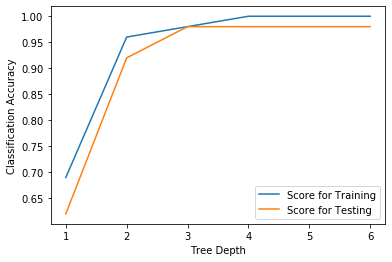

In [2]:

from sklearn.model_selection import train_test_split
X, y = df.iloc[:,:4].values, df['species'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 

from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dct= dct.fit(X_train, y_train)

# get the results for depths 1 through 6
resultsGini = pd.DataFrame(columns=['LevelLimit', 'Score for Training', 'Score for Testing'])
for treeDepth in range (1,7):
    dct = DecisionTreeClassifier(criterion='gini', max_depth=treeDepth, random_state=0)
    dct= dct.fit(X_train, y_train)
    dct.predict(X_test)
    scoreTrain = dct.score(X_train, y_train)
    scoreTest = dct.score(X_test, y_test)
    resultsGini.loc[treeDepth] = [treeDepth, scoreTrain, scoreTest]

print(resultsGini)
resultsGini.pop('LevelLimit')
ax = resultsGini.plot()
ax.set(xlabel="Tree Depth", ylabel="Classification Accuracy")

### Feature engineering and creating aggregates.

In [3]:
# feature engineering ratios
df['SepLen/SepWid']=df['sepal_length']/df['sepal_width']
df['SepLen/PetLen']=df['sepal_length']/df['petal_length']
df['SepLen/PetWid']=df['sepal_length']/df['petal_width']
df['SepWid/PetLen']=df['sepal_width']/df['petal_length']
df['SepWid/PetWid']=df['sepal_width']/df['petal_width']
df['PetLen/PetWid']=df['petal_length']/df['petal_width']
#Aggregates might work too
df['SepLen+SepWid']=df['sepal_length']+df['sepal_width']
df['PetLen+PetWid']=df['petal_length']+df['petal_width']
df['Sep+Pet']=df['SepLen+SepWid']+df['PetLen+PetWid']

#let's move 'Class' column to the end of this list
tempCol = df.pop('species')
df['species']=tempCol

eng_df = df.copy()

print(df.shape)
eng_df.head()

(150, 14)


,sepal_length,sepal_width,petal_length,petal_width,SepLen/SepWid,SepLen/PetLen,SepLen/PetWid,SepWid/PetLen,SepWid/PetWid,PetLen/PetWid,SepLen+SepWid,PetLen+PetWid,Sep+Pet,species
0,5.1,3.5,1.4,0.2,1.457143,3.642857,25.5,2.500000,17.5,7.0,8.6,1.6,10.2,setosa
1,4.9,3.0,1.4,0.2,1.633333,3.500000,24.5,2.142857,15.0,7.0,7.9,1.6,9.5,setosa
2,4.7,3.2,1.3,0.2,1.468750,3.615385,23.5,2.461538,16.0,6.5,7.9,1.5,9.4,setosa
3,4.6,3.1,1.5,0.2,1.483871,3.066667,23.0,2.066667,15.5,7.5,7.7,1.7,9.4,setosa
4,5.0,3.6,1.4,0.2,1.388889,3.571429,25.0,2.571429,18.0,7.0,8.6,1.6,10.2,setosa


In [ ]:
# visualize the relations
sns.pairplot(eng_df, hue='species')

    LevelLimit  Score for Training  Score for Testing
1          1.0                0.69               0.62
2          2.0                0.97               0.86
3          3.0                0.97               0.92
4          4.0                0.99               0.88
5          5.0                1.00               0.88
6          6.0                1.00               0.88
7          7.0                1.00               0.88
8          8.0                1.00               0.88
9          9.0                1.00               0.88
10        10.0                1.00               0.88
11        11.0                1.00               0.88
12        12.0                1.00               0.88
13        13.0                1.00               0.88
14        14.0                1.00               0.88
15        15.0                1.00               0.88
16        16.0                1.00               0.88
17        17.0                1.00               0.88
18        18.0              

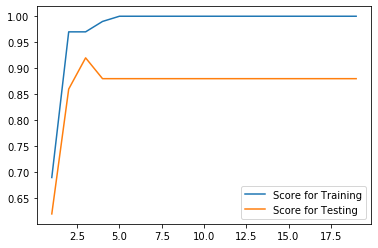

In [5]:
# build decision tree classifiers using the new dataset
resultsGini2 = pd.DataFrame(columns=['LevelLimit', 'Score for Training', 'Score for Testing'])

X, y = eng_df.iloc[:,:13].values, eng_df['species'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 


for treeDepth in range (1,20):
    dct = DecisionTreeClassifier(criterion='gini', max_depth=treeDepth, random_state=0)
    dct= dct.fit(X_train, y_train)
    dct.predict(X_test)
    scoreTrain = dct.score(X_train, y_train)
    scoreTest = dct.score(X_test, y_test)
    resultsGini2.loc[treeDepth] = [treeDepth, scoreTrain, scoreTest]

print(resultsGini2)
resultsGini2.pop('LevelLimit')
ax = resultsGini2.plot()


### Build a random forest classifier from the original Iris dataset

The RF will have 1000 estimators. We will again use 1/3-2/3 Holdout sampling. 
Additionally, random forest allows us to see importances of features (see .feature_importances_) and check https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html for more information.

In [6]:
#Reload the dataset for RF
df = sns.load_dataset('iris')

from sklearn.ensemble import RandomForestClassifier
feat_labels = df.columns[:4]
X = df[feat_labels]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 

forest = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
print("Training accuracy:", forest.score(X_train, y_train))
print("Testing accuracy:", forest.score(X_test, y_test))

importances = forest.feature_importances_
for f in range(X_train.shape[1]):
    print('Feature: ', feat_labels[f], '\tImportance: ', importances[f])

Training accuracy: 1.0
Testing accuracy: 0.96
Feature:  sepal_length 	Importance:  0.10884326894507074
Feature:  sepal_width 	Importance:  0.021413648976695704
Feature:  petal_length 	Importance:  0.4459078846012842
Feature:  petal_width 	Importance:  0.4238351974769493


Check the importances of the engineered features and how they compare to original set of features

In [7]:
X = eng_df.iloc[:, :13].values
y = eng_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 

feat_labels = eng_df.columns[:13]
forestEng = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
forestEng.fit(X_train, y_train)

print("Training accuracy:", forestEng.score(X_train, y_train))
print("Testing accuracy:", forestEng.score(X_test, y_test))

importances = forestEng.feature_importances_
for f in range(X_train.shape[1]):
    print('Feature: ', feat_labels[f], '\tImportance: ', importances[f])

Training accuracy: 1.0
Testing accuracy: 0.96
Feature:  sepal_length 	Importance:  0.006202260864139883
Feature:  sepal_width 	Importance:  0.0026027650954748662
Feature:  petal_length 	Importance:  0.13237700342555248
Feature:  petal_width 	Importance:  0.12558855236908792
Feature:  SepLen/SepWid 	Importance:  0.03559319493113186
Feature:  SepLen/PetLen 	Importance:  0.1520511925213159
Feature:  SepLen/PetWid 	Importance:  0.10401307382183758
Feature:  SepWid/PetLen 	Importance:  0.08964242954050786
Feature:  SepWid/PetWid 	Importance:  0.1156203068208364
Feature:  PetLen/PetWid 	Importance:  0.023596129121845458
Feature:  SepLen+SepWid 	Importance:  0.004689483184247032
Feature:  PetLen+PetWid 	Importance:  0.16027570248907247
Feature:  Sep+Pet 	Importance:  0.04774790581495029


In [ ]:
forestEng.feature_importances_

    Count of Trees  Score for Training  Score for Testing
1              1.0                0.96               0.92
2             11.0                0.99               0.98
3             21.0                0.99               0.98
4             31.0                0.99               0.98
5             41.0                0.99               0.98
6             51.0                0.99               0.98
7             61.0                0.99               0.98
8             71.0                0.99               0.98
9             81.0                0.99               0.98
10            91.0                0.99               0.98


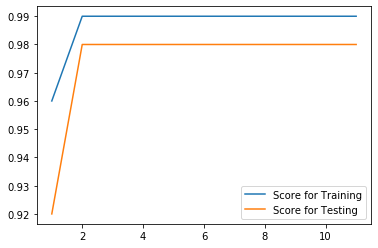

In [8]:
# Build a set of random forest with varying number of estimators using gini index.

from sklearn.ensemble import RandomForestClassifier
results = pd.DataFrame(columns=['Count of Trees', 'Score for Training', 'Score for Testing'])
indexR=1
for sizeOfForest in range (1, 102, 10):
    forest = RandomForestClassifier(criterion='gini', n_estimators=sizeOfForest, max_depth=3, random_state=0, n_jobs=-1)
    forest.fit(X_train, y_train)
    scoreTrain = forest.score(X_train, y_train)
    scoreTest = forest.score(X_test, y_test)
    results.loc[indexR] = [sizeOfForest, scoreTrain, scoreTest]
    indexR=indexR+1

print(results.head(10))
results.pop('Count of Trees')
ax = results.plot()